### Neural Networks and Computational Intelligence
**Assigment 1** \
Hugo Kolstee - s3515249 \
Yorick Juffer - s1993623

#### Libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Dataset
Generates a dataset where the vectors have a mean of 0 and a standard deviation of 1. Also generates the random labels of -1 and 1.

In [97]:
class Dataset:
    def __init__(self, p, n):
        self.p = p   # number of vectors
        self.n = n   # size of vectors
        self.left = int(self.p/2)
        self.right = self.p - self.left
        self.data = self.generate_data()
        self.labels = self.generate_labels()

    def generate_data(self):
        data_x = np.random.normal(0.01, 1, size=(self.left, self.n))
        data_y = np.random.normal(-0.01, 1, size=(self.right, self.n))
        data = np.concatenate((data_x, data_y))
        return data

    def generate_labels(self):
        labels_x = np.ones(self.left)
        labels_y = np.ones(self.right) * -1
        labels = np.concatenate((labels_x, labels_y))
        return labels

#### Training

In [98]:
def train(data, iterations):
    weights = np.zeros(data.n, dtype = float)
    
    for i in range(iterations):
        misclassifications = 0

        for j in range(0, data.p):
            
            if(np.dot(weights, data.data[j]) * data.labels[j] <= 0):
                weights += (1/data.n) * data.data[j] * data.labels[j]
                misclassifications += 1


    return (data.p - misclassifications)/data.p * 100

#### Perceptron

In [99]:
def perceptron(feature):
    
    feature_vectors = [int(i * feature) for i in np.arange(0.75, 4.25, 1/feature)]
    datasets = 50
    iterations = 100

    results = np.zeros(len(feature_vectors))

    for dataset in range(datasets):

        count = 0

        for feature_vector in feature_vectors:
            
            # generate
            data = Dataset(feature_vector, feature)

            # train
            accuracy = train(data, iterations)

            accuracy = (results[count] + accuracy) 
            results[count] = accuracy

            count += 1

            print("Dataset: {}     ".format(dataset), end="\r")

    results = pd.DataFrame(results/datasets)
    results = (results - results.min())/ (results.max() - results.min())
    results = results.assign(a=[i for i in np.arange(0.75, 4.25, 1/feature)])
    return results

#### Run:

---aset: 49     



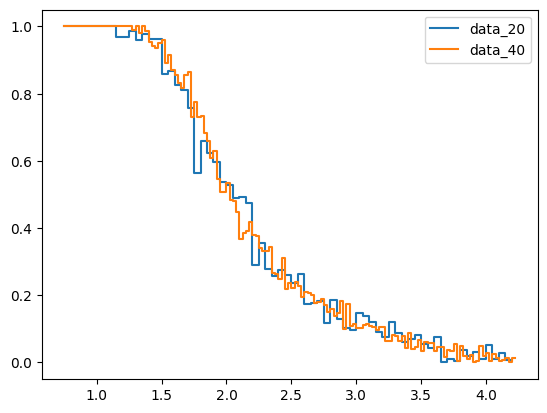

In [100]:
#run
data_20 = perceptron(20)
print("---\n")
data_40 = perceptron(40)
# data_50 = perceptron(50)
# data_100 = perceptron(100)

# plt.plot(data_25["a"], data_25[0], label = "data_25")
# plt.plot(data_50["a"], data_50[0], label = "data_50")
# plt.plot(data_100["a"], data_100[0], label = "data_100")
# plt.plot(data_200["a"], data_200[0], label = "data_200")

fig, ax = plt.subplots()

ax.step(data_20["a"], data_20[0], label = "data_20")
ax.step(data_40["a"], data_40[0], label = "data_40")

plt.legend(loc="upper right")
plt.show()

